# <b> Digit classification with Neural networks using MNIST and Keras </b>

---

## Objetivos

En este proyecto voy a utilizar una red neuronal para clasificar imágenes de dígitos del 0 al 9 escritos a mano. Para ello, utilizaré Keras con TensorFlow.

Con este proyecto se busca:
- Comprender el uso de redes neuronales en clasificación de imágenes
- Familiarizarse con el dataset MNIST
- Implementar un modelo de red neuronal
- Evaluar el rendimiento del modelo

## Descripción del proyecto

El dataset que voy a utilizar es MNIST. Este dataset se usa mucho en campos como la docencia, pero también es muy utilizado en trabajos reales de investigación para el entrenamiento de imágenes. 
Las imágenes pretenden representar los números del 0 al 9 escritos a mano en un tamaño de 28x28 píxeles.

En el siguiente [enlace](https://es.wikipedia.org/wiki/Base_de_datos_MNIST) hay más información sobre el dataset.

---

### <b> Carga de los datos </b>

In [137]:
from keras.datasets.mnist import load_data #Importo la función load_data de MNIST, que se usa para cargar las imágenes y las etiquetas de los dígitos
import tensorflow as tf

In [138]:
mnist = tf.keras.datasets.mnist # Guardo la referencia del dataset en la variable mnist

(training_images, training_labels), (test_images, test_labels) = load_data() # Cargo el dataset y lo divido en datos de entrenamiento (imágenes y etiquetas) y test (imágenes y etiquetas)

El dataset MNIST está guardado internamente en Keras, por lo que se puede utilizar sin necesidad de buscar el dataset de forma externa.

Llamar a **load_data** en me proporciona 2 conjuntos de 2 listas, estos serán los valores de entrenamiento y test para los gráficos que contienen los dígitos y sus etiquetas.

### <b> Información sobre el dataset </b>

Con los datos cargados en memoria, vamos a obtener información sobre ellos.

#### ¿Cuántas imágenes hay de *training* y de *test*? ¿Qué tamaño tienen las imágenes?

In [139]:
print("Shape de training_images:", training_images.shape)
print("Shape de test_images:", test_images.shape)

Shape de training_images: (60000, 28, 28)
Shape de test_images: (10000, 28, 28)


Vemos que hay 60.000 imágenes para el conjunto de entrenamiento y 10.000 para el conjunto de test. En ambos conjunto las imágenes tienen un tamaño de 28x28.

Represento la primera imagen con el fin de conocer mejor la naturaleza del dataset.

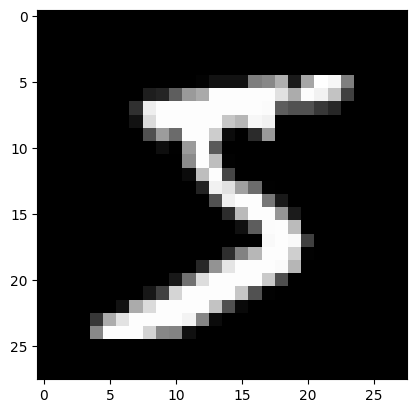

Su etiqueta asignada es: 5
__________________________________________
Matriz de la primera imagen:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39  

In [140]:
import numpy as np
import matplotlib.pyplot as plt

# En la mayoría de casos es preferible trabajar con imágenes en blanco y negro, ya que requieren menos procesamiento (solo un canal).
plt.imshow(training_images[0], cmap="gray") # Muestro la primera imagen del dataset de entrenamiento en blanco y negro
plt.show()

np.set_printoptions(linewidth=200)                          # Configuro la salida para que la matriz tenga espacio horizontal suficiente para mostrarse correctamente.
print(f"Su etiqueta asignada es: {training_labels[0]}")     # Muestro la etiqueta que tiene asignada la primera imagen
print("_"*42)
print("Matriz de la primera imagen:\n", training_images[0]) # Muestro cómo se almacena la primera imagen en escala de grises


Cada imagen guardada consiste en una matriz de 28x28 píxeles, donde cada número en la matriz es un valor de intensidad de gris que va de 0 (negro) a 255 (blanco). 

La información en Y (las etiquetas) es el dígito que la imagen representa, un número entre 0 y 9, que es la respuesta correcta para cada imagen. Estas etiquetas se utilizarán durante el entrenamiento de la red neuronal para saber qué salida debería producirse cuando se muestra una imagen.

### **Normalización y preprocesado de los datos**

#### Normalización

Todos los valores numéricos están entre 0 y 255. Para entrenar redes neuronales, es una buena práctica transformar todos los valores a un rango entre 0 y 1, lo que se habitualmente se llama "normalización".

In [141]:
# Divido entre 255 los valores para normalizar a un rango de 0 a 1
training_images = training_images / 255.0
test_images = test_images / 255.0

#### Conversión a vectores de 1 dimensión

Las redes neuronales suelen trabajar con vectores de una única dimensión como entrada. Por tanto, es necesario reducir las imágenes que tengo de 28x28 píxeles (2 dimensiones), tienen que transformarse en vectores de 784 valores (28*28 = 784).
Con esto se facilita el cálculo y procesamiento de los pesos en las capas de la red neuronal.


In [142]:
# Cambia la forma de los datos de entrenamiento y test para que sean vectores de tamaño 784
# "-1" permite que NumPy ajuste automáticamente la primera dimensión según el número total de imágenes.
training_images = training_images.reshape(-1, 28*28) 
test_images = test_images.reshape(-1, 28*28)

print(f"Nueva forma de training_images después del cambio: {training_images.shape}")
print(f"Nueva forma de test_images después del cambio: {test_images.shape}")

Nueva forma de training_images después del cambio: (60000, 784)
Nueva forma de test_images después del cambio: (10000, 784)


Se obtienen 60000 imágenes en el conjunto de entrenamiento, donde cada imagen está representada en 1 único vector por 784 píxeles. Lo mismo ocurre en el conjunto de test, donde se han obtenido 10000 imágenes.

#### One-hot encoding

In [143]:
print("\nEtiqueta antes de one-hot encoding:", training_labels[0]) # Por defecto viene almacenado como un número entero, 5 en este caso.
print(f"Forma de test_labels antes del cambio: {test_labels.shape}")
print(f"Forma de training_labels antes del cambio: {training_labels.shape}")

# Aplico one-hot encoding a las etiquetas de entrenamiento y test
training_labels = tf.keras.utils.to_categorical(training_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)


print("\nEtiqueta después de one-hot encoding:", training_labels[0]) #Era un 5 antes de aplicarlo
print("Nueva forma de test_labels:", test_labels.shape)
print("Nueva forma de training_labels:", training_labels.shape)


Etiqueta antes de one-hot encoding: 5
Forma de test_labels antes del cambio: (10000,)
Forma de training_labels antes del cambio: (60000,)

Etiqueta después de one-hot encoding: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Nueva forma de test_labels: (10000, 10)
Nueva forma de training_labels: (60000, 10)


Se aplicó One-hot-encoding a las etiquetas para facilitar la predicción y evitar confusiones entre números cercanos, ya que solo es posible tener una posición activada. 

Para el ejemplo expuesto la etiqueta corresponde al número "5", pero al aplicar One-hot-encoding, se representa como un vector de 10 posiciones en el que solo la 6ª posición estará activada.
- 5 -> [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]

Esto facilita el procesamiento y hace más eficiente el entrenamiento de la red neuronal.

### **Creación del modelo**

Para la definición del modelo es necesario tener claro una serie de conceptos muy útiles:
- **Sequential**: Define una SECUENCIA de capas en la red neuronal
  
- **Dense**: Añade una capa de neuronas

- **Flatten**: Convierte un vector multidimensional a un vector de una dimensión.

Cada capa de neuronas necesita una función de activación. Normalmente se usa la función relu en las capas intermedias y softmax en la ultima capa (en problemas de clasificación de más de dos items)
- **Relu**: significa que "Si X>0 devuelve X, si no, devuelve 0", así que lo que hace es pasar sólo valores 0 o mayores a la siguiente capa de la red.
  
- **Softmax**: Coge un conjunto de valores y lo convierte en un vector de probabilidades que suman 1.

In [144]:

model = tf.keras.models.Sequential() # Se define el modelo secuencial

model.add(tf.keras.layers.Input(shape=(784,)))             # Capa de entrada con forma (784,) que es el tamaño de las imágenes
model.add(tf.keras.layers.Dense(512, activation='relu'))   # Capa oculta con 512 neuronas y función de activación relu y una capa de entrada de 784
model.add(tf.keras.layers.Dense(10, activation='softmax')) # Capa de salida con 10 neuronas y función de activación softmax

model.summary() # Muestra un resumen del modelo creado

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

En este caso, no es necesario usar "flatten" debido a que su función ya la hice anteriormente de forma manual con el reshape.

### **Compilación y entrenamiento**

Para la compilación del modelo usaré los siguientes parámetros:

- **Adam**: Optimizador que se encarga de ajustar los pesos para mejorar la capacidad de la red de "aprender". Se adapta bien a diferentes problemas y es computacionalmente eficiente.

- **Categorical Crossentropy**: Es una forma de medir cómo de equivocadas son las predicciones cuando se clasifica en varias categorías.

- **Accuracy**: Monitoriza el porcentaje de aciertos en cada epoch, lo que permite ver la evolución del modelo durante el entrenamiento.

In [145]:
# Compilación del modelo
model.compile(optimizer='adam',                # Optimizador
              loss='categorical_crossentropy', # Función de pérdida
              metrics=['accuracy'])            # Monitoriza la tasa de acierto durante el entrenamiento

Para la compilación del modelo usaré los siguientes parámetros:

- **Epochs**: Número de veces que el modelo pasará por el conjunto completo de entrenamiento, actualizando los pesos después de cada lote de datos (batch).

- **Batch_size = 32**: Número de muestras que el modelo procesa antes de actualizar los pesos, es decir, procesará 32 imágenes y sus etiquetas a la vez antes de ajustar los pesos.

- **Validation_split = 0.25**: Porcentaje de los datos de entrenamiento que se apartarán para validación. En este caso, el 25% de training_images y training_labels se utilizarán como datos de validación.

In [146]:
# Entrenamiento del modelo
history = model.fit(training_images, training_labels, epochs=5, batch_size=32, validation_split=0.25)

Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8898 - loss: 0.3813 - val_accuracy: 0.9605 - val_loss: 0.1295
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9708 - loss: 0.0957 - val_accuracy: 0.9689 - val_loss: 0.0990
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9840 - loss: 0.0531 - val_accuracy: 0.9728 - val_loss: 0.0897
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9881 - loss: 0.0382 - val_accuracy: 0.9730 - val_loss: 0.0917
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9919 - loss: 0.0270 - val_accuracy: 0.9745 - val_loss: 0.0913


### **Impacto al variar el número de neuronas en las capas ocultas**

Voy a experimentar con la red neuronal cambiando el numero de neuronas de 512 por otros valores para ver que variaciones sufre en su comportamiento.

#### Con 216 neuronas en la capa oculta

In [147]:
# Se define el modelo secuencial
model = tf.keras.models.Sequential([             # Esta vez lo defino como una lista (así evito el uso de add en cada paso)
tf.keras.layers.Input(shape=(784,)),
tf.keras.layers.Dense(216, activation='relu'),   # Coloco 216 neuronas en la capa oculta
tf.keras.layers.Dense(10, activation='softmax')])

# Compilación del modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(training_images, training_labels, epochs=5, batch_size=32, validation_split=0.25)


Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8689 - loss: 0.4515 - val_accuracy: 0.9550 - val_loss: 0.1506
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9657 - loss: 0.1181 - val_accuracy: 0.9690 - val_loss: 0.1039
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9779 - loss: 0.0742 - val_accuracy: 0.9694 - val_loss: 0.1003
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9854 - loss: 0.0480 - val_accuracy: 0.9717 - val_loss: 0.0953
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9892 - loss: 0.0364 - val_accuracy: 0.9746 - val_loss: 0.0894


#### Con 1024 neuronas en la capa oculta

In [148]:
# Se define el modelo secuencial
model = tf.keras.models.Sequential([
tf.keras.layers.Input(shape=(784,)),
tf.keras.layers.Dense(1024, activation='relu'), # Coloco 1024 neuronas en la capa oculta
tf.keras.layers.Dense(10, activation='softmax')])

# Compilación del modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(training_images, training_labels, epochs=5, batch_size=32, validation_split=0.25)


Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8944 - loss: 0.3521 - val_accuracy: 0.9641 - val_loss: 0.1187
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9753 - loss: 0.0843 - val_accuracy: 0.9711 - val_loss: 0.0921
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9855 - loss: 0.0462 - val_accuracy: 0.9737 - val_loss: 0.0889
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9895 - loss: 0.0323 - val_accuracy: 0.9730 - val_loss: 0.0972
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9921 - loss: 0.0240 - val_accuracy: 0.9729 - val_loss: 0.1062


#### Impacto de las variaciones

Lo primero que se puede notar es que el tiempo de entrenamiento va aumentando conforme aumenta el número de neuronas, ya que aumentan el número de parámetros y por tanto de recursos necesarios.

En términos de precisión se puede ver que con:

- 216 neuronas: Se alcanza una precisión final de 97.35% y una loss de 0.0918. -> Mas eficiente en tiempo y precisión, respecto a los otros.
- 512 neuronas: Se alcanza una precisión final de 97.23% y una loss de 0.0971, que va incrementándose en las últimas epochs (overfitting).
- 1024 neuronas: Se alcanza una precisión final de 97.39% y una loss de 0.1003, que va incrementándose en las últimas epochs (overfitting).

Por tanto, para este pequeño experimento se observa que aunque todos los modelos tienen una precisión muy similar, **añadir muchas más neuronas no siempre lleva a una mejora en el rendimiento**.

### **Reflexión sobre el número de neuronas de la capa de salida**

- ¿Por qué son 10 las neuronas de la última capa? ¿Qué pasaría si tuvieras una cantidad diferente a 10?

In [ ]:
# Red neuronal con 5 neuronas en la capa de salida en vez de 10

# Se define el modelo
model = tf.keras.models.Sequential([
tf.keras.layers.Input(shape=(784,)),
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dense(5, activation='softmax')]) #Con 5 neuronas en la capa de salida en vez de 10

# Compilación del modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(training_images, training_labels, epochs=5, batch_size=32, validation_split=0.25)


Epoch 1/5


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 10), output.shape=(None, 5)

#### ¿Por qué son 10 las neuronas de la última capa?

Porque cada una de esas neuronas representa un dígito, ya que que tenemos 10 posibles dígitos/salidas (0 a 9), en función de qué dígito identifique activará una salida u otra.

Esto se ve en el propio código que al cambiarlo a 5 neuronas de salida, un error nos indica que deben ser 10.


#### ¿Qué pasaría si tuviera una cantidad diferente a 10?

- Si la última capa fuera un número mayor a 10 la red podría llegar a clasificar erróneamente los dígitos, ya que habría más salidas de las necesarias.

- Si la última capa fuera un número menor a 10 la red no podría clasificar todos los dígitos de forma precisa, haciendo que algunos dígitos compartieran una misma neurona de salida. Por ejemplo, con 5 neuronas de salida (0 a 4), la imagen que representa un 7, al no tener su neurona de salida, buscará la "más parecida" y probablemente lo acabe clasificando erróneamente como un 1 o un 2.

### **Impacto al variar el número de epochs**

Esta vez voy a experimentar con la red neuronal cambiando el numero de epochs de 5 por otros valores para ver que variaciones sufre en su comportamiento.

#### Con 15 epochs

In [150]:
# Código para 15 epoch

# Se define el modelo secuencial
model = tf.keras.models.Sequential([
tf.keras.layers.Input(shape=(784,)),
tf.keras.layers.Dense(512, activation='relu'), 
tf.keras.layers.Dense(10, activation='softmax')])

# Compilación del modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(training_images, training_labels, epochs=15, batch_size=32, validation_split=0.25) # Coloco 15 epochs en vez de 5


Epoch 1/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8864 - loss: 0.3849 - val_accuracy: 0.9603 - val_loss: 0.1359
Epoch 2/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9718 - loss: 0.0913 - val_accuracy: 0.9699 - val_loss: 0.0972
Epoch 3/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9834 - loss: 0.0544 - val_accuracy: 0.9721 - val_loss: 0.0948
Epoch 4/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9882 - loss: 0.0371 - val_accuracy: 0.9722 - val_loss: 0.0969
Epoch 5/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9914 - loss: 0.0259 - val_accuracy: 0.9733 - val_loss: 0.0950
Epoch 6/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9937 - loss: 0.0194 - val_accuracy: 0.9758 - val_loss: 0.1012
Epoch 7/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9948 - loss: 0.0168 - val_accuracy: 0.9732 - val_loss: 0.1002
Epoch 8/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9955 - loss: 0.0132 -

#### Con 30 epochs

In [151]:
# Código para 30 epoch

# Se define el modelo secuencial
model = tf.keras.models.Sequential([
tf.keras.layers.Input(shape=(784,)),
tf.keras.layers.Dense(512, activation='relu'), 
tf.keras.layers.Dense(10, activation='softmax')])

# Compilación del modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento del modelo
history = model.fit(training_images, training_labels, epochs=30, batch_size=32, validation_split=0.25) # Coloco 30 epochs en vez de 5


Epoch 1/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8837 - loss: 0.3908 - val_accuracy: 0.9619 - val_loss: 0.1291
Epoch 2/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9720 - loss: 0.0941 - val_accuracy: 0.9709 - val_loss: 0.0976
Epoch 3/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9844 - loss: 0.0540 - val_accuracy: 0.9753 - val_loss: 0.0814
Epoch 4/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9892 - loss: 0.0352 - val_accuracy: 0.9732 - val_loss: 0.0884
Epoch 5/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9909 - loss: 0.0285 - val_accuracy: 0.9750 - val_loss: 0.0909
Epoch 6/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9929 - loss: 0.0216 - val_accuracy: 0.9759 - val_loss: 0.0882
Epoch 7/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9955 - loss: 0.0143 - val_accuracy: 0.9746 - val_loss: 0.1019
Epoch 8/30
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9964 - loss: 0.0116 - 

#### Impacto de las variaciones

El aumento de epochs en ambos casos ha provocado el mismo efecto, pero con 30 se ve aún más marcado. Al inicio de los entrenamientos la precisión del modelo va mejorando, pero llega un momento en el que añadir tantas epoch causa que el modelo pierda su capacidad para generalizar y se ajusta demasiado a los datos de entrenamiento. Esto se ve en que la pérdida de validación comienza a aumentar, mientras que la pérdida de entrenamiento sigue disminuyendo y la precisión se acerca al 100%. 

A este efecto se le conoce como sobreajuste.

### **Early Stopping**

En el ejercicio anterior, cuando entrené con epoch extras, pensé "¿no estaría bien si pudiera parar el entrenamiento cuando alcance un valor deseado?", es decir, una precisión del 87% podría ser suficiente, y si alcanzo eso después de 3 epoch, ¿por qué seguir esperando a que termine muchas más épocas?, además de esta forma podría prevenir también un overfitting excesivo.

Afortunadamente, Keras ofrece herramientas que nos permiten controlar y optimizar el proceso de entrenamiento, como callbacks, entre los que destaca **EarlyStopping**.

Los callbacks son funciones o clases que permiten ejecutar acciones específicas durante el entrenamiento.

EarlyStopping de Keras es un callback que monitorea una métrica durante el entrenamiento y lo detiene cuando la métrica deja de mejorar. Sus parámetros principales son:

- **Monitor**: Especifica la métrica a monitorear

- **Patience**: Número de épocas extras que entrenará el modelo después de detectar que la métrica monitoreada dejó de mejorar.

- **Restore_best_weights = True**: Cuando se detiene el entrenamiento, restaura los pesos del modelo al estado de la mejor época (la que tenía el valor óptimo de la métrica monitoreada). Asegura que no se use un modelo con un rendimiento peor (que podría haberse entrenado de más).

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping # Importar la clase EarlyStopping incluida en Keras

# Defino el modelo secuencial
model = tf.keras.models.Sequential([
tf.keras.layers.Input(shape=(784,)),
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dense(10, activation='softmax')])

# Compilación del modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Configuración de Early Stopping
early_stop = EarlyStopping(
    monitor='val_loss',        # Monitorea la pérdida en el conjunto de validación
    patience=3,                # Detiene el entrenamiento si no mejora en 3 épocas consecutivas
    restore_best_weights=True  # Restaura los pesos de la mejor época al final
)

# Entrenamiento del modelo con Early Stopping
history = model.fit(
    training_images, 
    training_labels, 
    epochs=40,                # Configuro un número alto de épocas; EarlyStopping decidirá cuándo detenerse
    batch_size=32, 
    validation_split=0.25, 
    callbacks=[early_stop]    # Agrego el callback de Early Stopping
)


Epoch 1/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8884 - loss: 0.3821 - val_accuracy: 0.9617 - val_loss: 0.1274
Epoch 2/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9706 - loss: 0.0977 - val_accuracy: 0.9672 - val_loss: 0.1065
Epoch 3/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9824 - loss: 0.0585 - val_accuracy: 0.9693 - val_loss: 0.0991
Epoch 4/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9882 - loss: 0.0381 - val_accuracy: 0.9679 - val_loss: 0.1020
Epoch 5/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9928 - loss: 0.0246 - val_accuracy: 0.9725 - val_loss: 0.1034
Epoch 6/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9944 - loss: 0.0175 - val_accuracy: 0.9763 - val_loss: 0.0852
Epoch 7/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9962 - loss: 0.0128 - val_accuracy: 0.9745 - val_loss: 0.1008
Epoch 8/40
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9963 - loss: 0.0121 - 

A pesar de tener más epochs pendientes de realizar se detiene en cuanto se cumplen 3 epochs sin mejorar (desde la epoch 6).

### **Funciones de activación**

A continuación voy a evaluar la importancia de utilizar las funciones de activación adecuadas. 

Crearé un modelo de red neuronal con más capas en la que iré variando su función de activación para ver que efectos produce.

#### Modelo con ReLU

In [154]:
model_relu = tf.keras.models.Sequential([           # Se define el modelo secuencial como una lista (evito el uso de add paso a paso)
    tf.keras.layers.Input(shape=(784,)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model_relu = tf.keras.models.Sequential([
    model.add(tf.keras.layers.Input(shape=(784,))),
    model.add(tf.keras.layers.Dense(512, activation='relu')),
    model.add(tf.keras.layers.Dense(256, activation='relu')),
    model.add(tf.keras.layers.Dense(128, activation='relu')),
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
])

model_relu = tf.keras.models.Sequential()
model_relu.add(tf.keras.layers.Input(shape=(784,)))
model_relu.add(tf.keras.layers.Dense(512, activation='relu'))
model_relu.add(tf.keras.layers.Dense(256, activation='relu'))
model_relu.add(tf.keras.layers.Dense(128, activation='relu'))
model_relu.add(tf.keras.layers.Dense(10, activation='softmax'))


model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(784,)))
model.add(tf.keras.layers.Dense(512, activation='relu')) 
model.add(tf.keras.layers.Dense(10, activation='softmax'))

#Compilación del modelo
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Entrenamiento del modelo
history_relu = model_relu.fit(training_images, training_labels, epochs=8, batch_size=32, validation_split=0.25)


SyntaxError: invalid syntax. Perhaps you forgot a comma? (1152090973.py, line 2)

#### Modelo con Sigmoide

In [ ]:
#--- Modelo con Sigmoid ---
model_sigmoid = tf.keras.models.Sequential([
    model.add(tf.keras.layers.Input(shape=(784,))),
    tf.keras.layers.Dense(512, activation='sigmoid', input_shape=(784,)),
    tf.keras.layers.Dense(256, activation='sigmoid'),
    tf.keras.layers.Dense(128, activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#Compilación del modelo
model_sigmoid.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Entrenamiento del modelo
history_sigmoid = model_sigmoid.fit(training_images, training_labels, epochs=8, batch_size=32, validation_split=0.25)

#### Modelo con Tanh

In [ ]:
model_tanh = tf.keras.models.Sequential([
    model.add(tf.keras.layers.Input(shape=(784,))),
    tf.keras.layers.Dense(512, activation='tanh'),
    tf.keras.layers.Dense(256, activation='tanh'),
    tf.keras.layers.Dense(128, activation='tanh'),
    tf.keras.layers.Dense(10, activation='softmax')
])

#Compilación del modelo
model_tanh.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

#Entrenamiento del modelo
history_tanh = model_tanh.fit(training_images, training_labels, epochs=8, batch_size=32, validation_split=0.25)


#### Impacto de las variaciones